## Machine Learning Lab 01 -House Price Prediction using Python


**Submitted by:** Jyosna Philip\
**Register number:** 23122019\
**Class:** 3 M.Sc Data Science A
___

**I. Lab Overview**

**Objectives**

Use the California Housing dataset to perform exploratory data analysis and predict housing prices using a Linear Regression model from the sklearn library. Investigate how various hyperparameters affect the model's performance.

**Problem Approach**

After data cleaning, an EDA is carried out. Visualisations are done with the Python libraries Pandas, Matplotlib, Seaborn and Geopandas. After gaining insights from EDA, linear regression was done multiple times, each time the dataset had undergone different preprocessing techniques(normalization, feature selection, standardization) to identify what method increases the accuracy in our case.
____


**Contents**

A. Data Exploration


- Preliminary Analysis
- Data Cleaning
- Visualization

B. Linear Regression Model

- Data Splitting
- LR Model with different configurations

C. Visualisation on the best model

D. Results

E. Conclusion

F. References
___

**A. Data Exploration**

**Dataset Description**

The California Housing dataset includes metrics such as the median income, housing median age, average room numbers, average bedroom numbers, population, average occupancy, latitude, and longitude of a block group in California.

The dataset has 7 features:
1. MedInc: median income in block group.
2. HouseAge: median house age in block group.
3. AveRooms: average number of rooms per household.
4. AveBedrms: average number of bedrooms per household.
5. Population: block group population.
6. AveOccup: average number of household members.
7. Latitude: block group latitude.
8. Longitude: block group longitude.

The target variable is:\
MedHouseVal: median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

**Importing Libraries**

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\jyosn\AppData\Local\Temp\ipykernel_4136\3925843854.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Loading Data into a pandas DataFrame**

In [2]:
cal_house=fetch_california_housing(as_frame=True)
cal_df=cal_house.frame

**Preliminary Analysis**

In [3]:
cal_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
cal_df.shape

(20640, 9)

The dataset has 20640 observations.

In [5]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
cal_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

All columns have float values and there are no null values.

In [7]:
cal_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


There are outliers in columns like AveBedrms, AveOccup and AveRooms, and MedInc\
The range of values of MedHouseVal, HouseAge,MedInc are also very different from that of Population,AveOccup

**Data Cleaning**

As there were no null values, imputations nedd not be done. Normalisation/Standardization are done after splitting the dataset.

**Visualisation**

Plotting histograms of each column to understand their distribution.

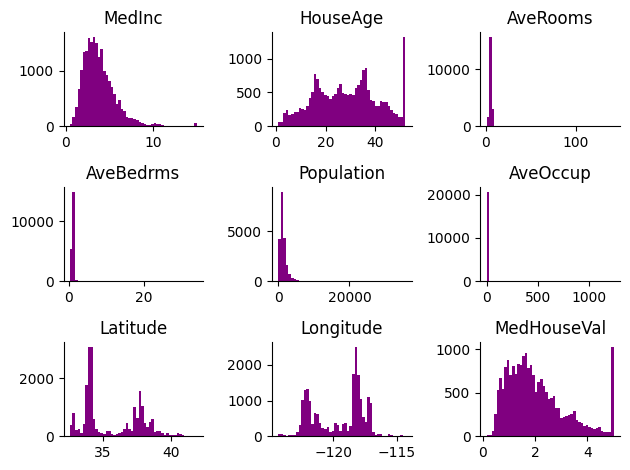

In [8]:
fig,ax=plt.subplots(3,3)
histo=cal_df.hist(bins=50,figsize=(25,12),grid=False,color="purple",ax=ax)

for i in range(0,3):
    for j in range(0,3):
        ax[i,j].spines["top"].set_visible(False)
        ax[i,j].spines["right"].set_visible(False)
plt.tight_layout()

Median income and median house value has skewed normal distribution.

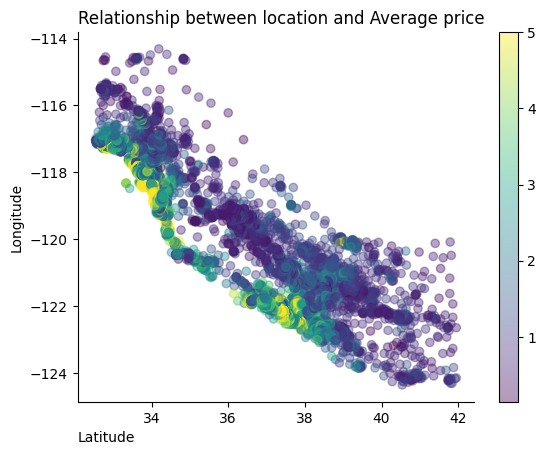

In [9]:
#Variation of median house price with geography
fig,ax=plt.subplots()
f=plt.scatter(x=cal_df["Latitude"],y=cal_df["Longitude"],alpha=0.4,c=cal_df["MedHouseVal"])
plt.title("Relationship between location and Average price",loc="left")
plt.xlabel("Latitude",loc="left")
plt.ylabel("Longitude")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


fig.colorbar(f)

To get more context, mapping the points into an actual map of California

In [10]:
#plot in a map
import geopandas as gpd

Reading a shapefile for california with county level markings into a geographic dataframe.
Shapefile from: data.gov

In [11]:
#Coordinate reference system(crs) is the system by which the information of a 3d object will be stored in the 2d plane.
#crs used should be same for all layers of a map
sh=gpd.read_file("ca_county\ca_county_boundaries.shp")
sh.crs 

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
#converting cal_df to a geodf using crs same as the shapefile
gdf=gpd.GeoDataFrame(cal_df,geometry=gpd.points_from_xy(cal_df.Longitude,cal_df.Latitude),crs="EPSG:3857") 
gdf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,geometry
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,POINT (-122.230 37.880)
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,POINT (-122.220 37.860)
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,POINT (-122.240 37.850)
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,POINT (-122.250 37.850)
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,POINT (-122.250 37.850)


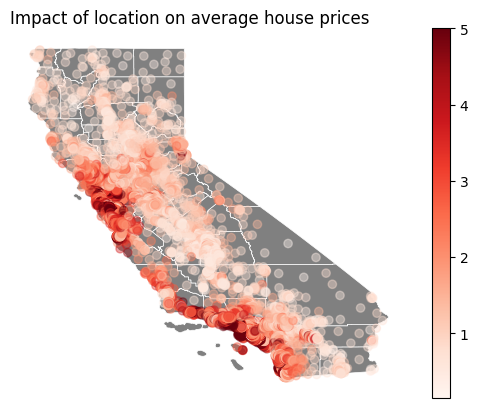

In [13]:
#plotting

fig,ax=plt.subplots()
sh.plot(ax=ax,color="grey",linewidth=0.5,edgecolor="white")  #baselayer
ax.set_axis_off()  
f=gdf.plot(ax=ax,column="MedHouseVal",alpha=0.4,legend=True,cmap='Reds') #layer2
plt.title("Impact of location on average house prices", loc="left")
plt.show()

We can clearly see that the coastal areas see more increasing house prices. Specifically if we find the names of the counties with higher prices, they include the more famous parts of California, like Los Angeles, San Francisco,Santa Cruz,San Diego and so on.

In [14]:
import seaborn as sns

<Axes: >

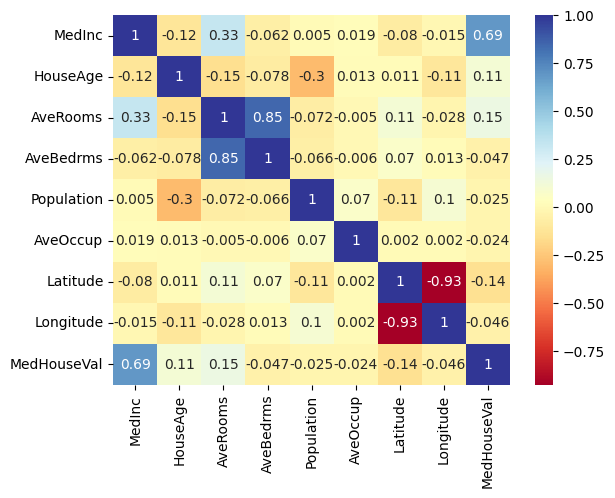

In [15]:
#checking correlation between variables

crm=cal_df.corr().round(3)
plt.figure()
sns.heatmap(crm,annot=True,cmap="RdYlBu")

Median income has a high positive correlation with our target variable Median house price.
There is also correlation between longitude and latitude and between average bedrooms and average rooms.
Since the average rooms will by default count the bedrooms in a house, both the features are not required and so we could removed average bedrooms, which has a lesser correlation with the target variable ,for regression.

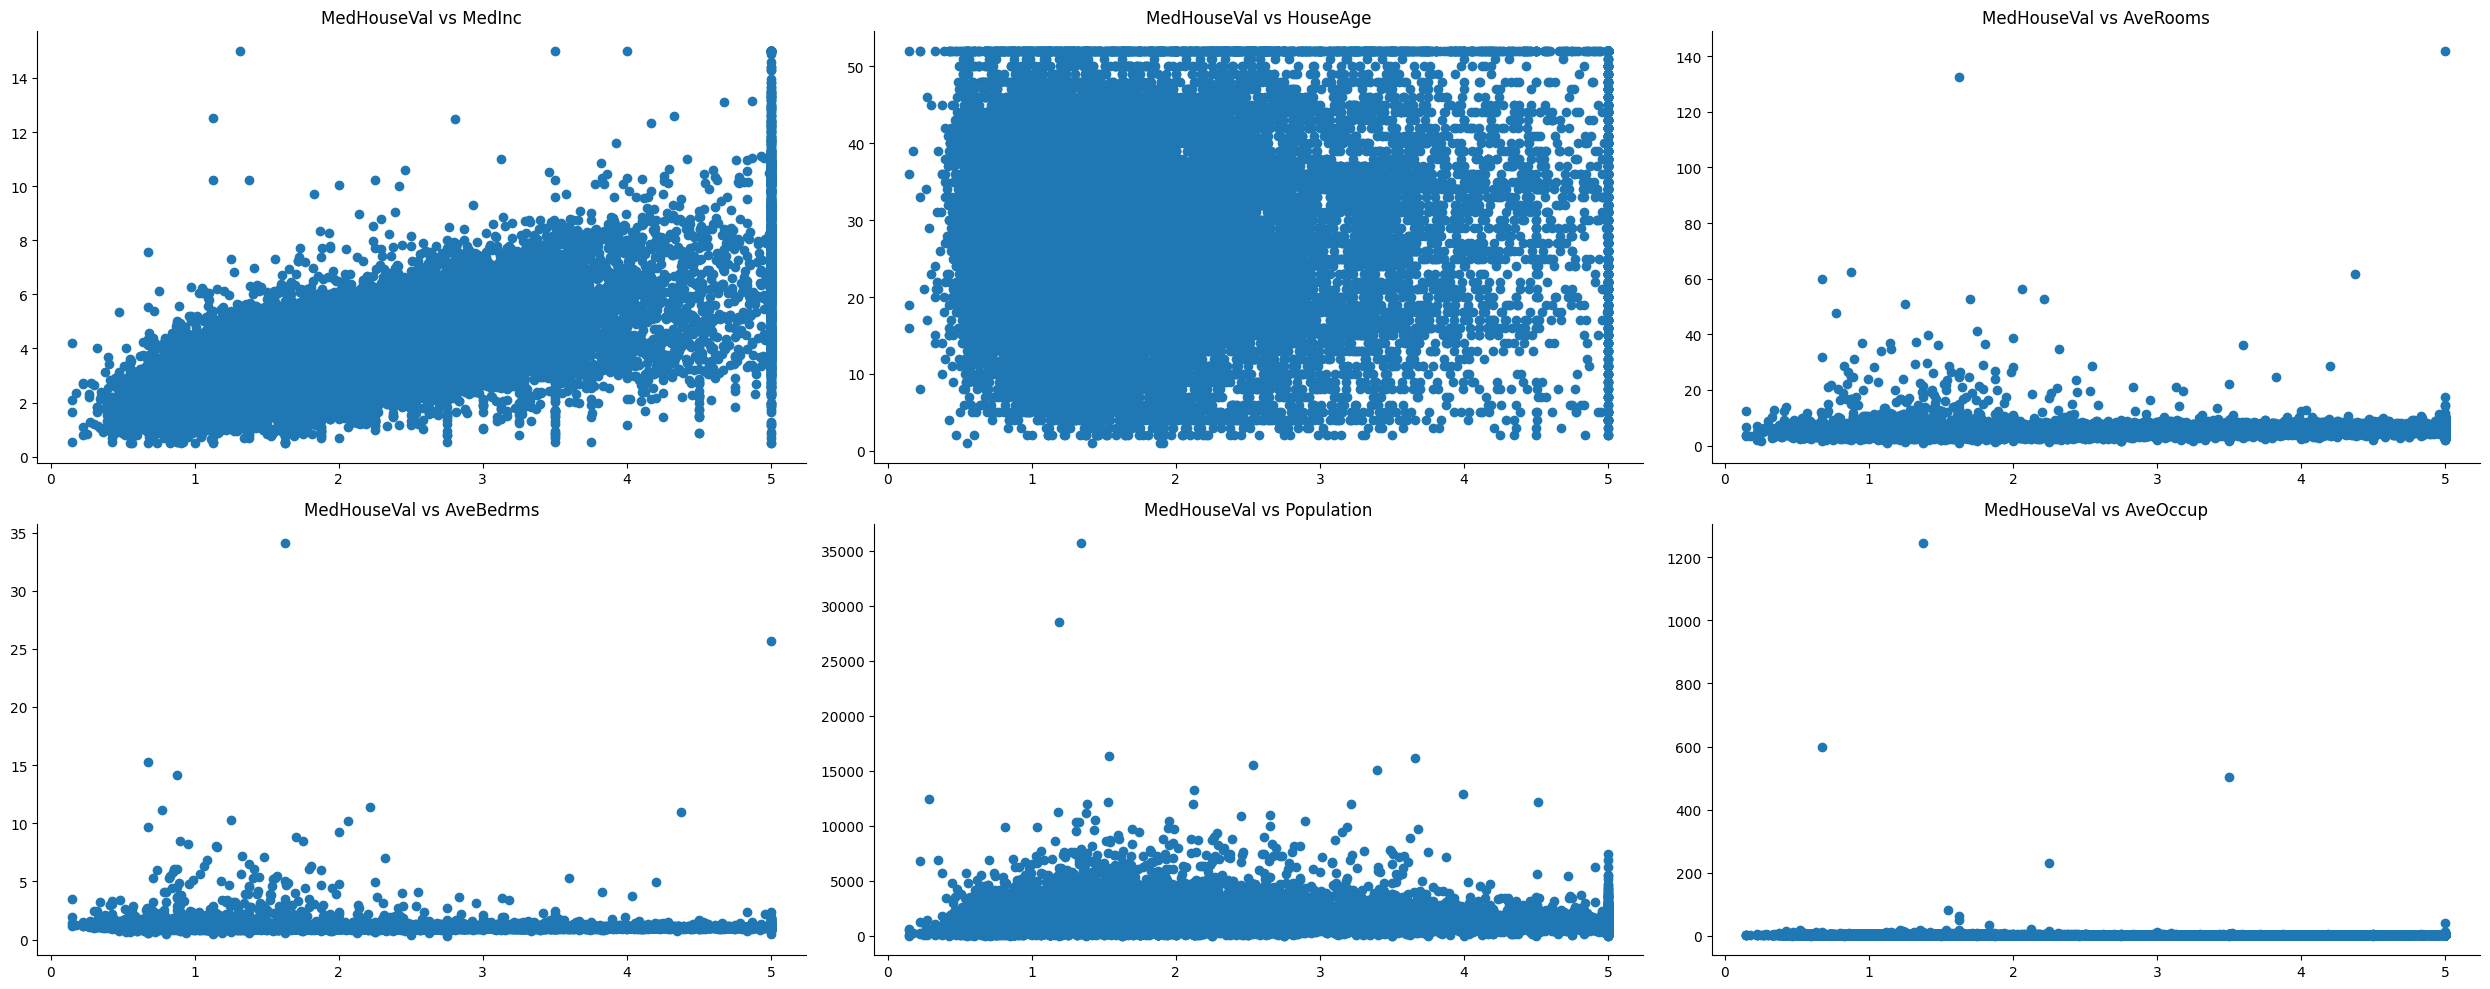

In [16]:
#variation in median income for different features other than geographical
fig,ax=plt.subplots(2,3,figsize=(25,10))
ax[0,0].scatter(cal_df["MedHouseVal"],cal_df[cal_df.columns[0]],)
ax[0,0].set_title("MedHouseVal vs "+cal_df.columns[0])
ax[0,0].spines["top"].set_visible(False)
ax[0,0].spines["right"].set_visible(False)
ax[0,1].scatter(cal_df["MedHouseVal"],cal_df[cal_df.columns[1]],)
ax[0,1].set_title("MedHouseVal vs "+cal_df.columns[1])
ax[0,1].spines["top"].set_visible(False)
ax[0,1].spines["right"].set_visible(False)
ax[0,2].scatter(cal_df["MedHouseVal"],cal_df[cal_df.columns[2]],)
ax[0,2].set_title("MedHouseVal vs "+cal_df.columns[2])
ax[0,2].spines["top"].set_visible(False)
ax[0,2].spines["right"].set_visible(False)
ax[1,0].scatter(cal_df["MedHouseVal"],cal_df[cal_df.columns[3]],)
ax[1,0].set_title("MedHouseVal vs "+cal_df.columns[3])
ax[1,0].spines["top"].set_visible(False)
ax[1,0].spines["right"].set_visible(False)
ax[1,1].scatter(cal_df["MedHouseVal"],cal_df[cal_df.columns[4]],)
ax[1,1].set_title("MedHouseVal vs "+cal_df.columns[4])
ax[1,1].spines["top"].set_visible(False)
ax[1,1].spines["right"].set_visible(False)
ax[1,2].scatter(cal_df["MedHouseVal"],cal_df[cal_df.columns[5]],)
ax[1,2].set_title("MedHouseVal vs "+cal_df.columns[5])
ax[1,2].spines["top"].set_visible(False)
ax[1,2].spines["right"].set_visible(False)
plt.tight_layout()


People with more income will be able to afford more expensive houses, as they would want to increase their quality of life by staying in good neighbourhoods.

___

**B. Linear Regression Model**

**Data Processing**

Since our columns have varying range we need to carry out feature scaling measures.
We need to carry out feature scaling after splitting the data to prevent data leakage.
Otherwise, when scaling we will be choosing the scale by also considering the test data which is technically unseen data.
The scale obtained from training set should be used on testing set.
Since some feature selection methods are affected by scale, we will scale first and then select the features

In [17]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
X=cal_df.iloc[:,0:8]
y=cal_df.iloc[:,8]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**- 6  datasets**\
    a. one normalised : with feature selection, and without\
    b. one standardised: with feature selection, without\
    c. one without normalisation or standardisation: with feature selection, without

Each of these dataset are then sent through two models with different `fit_intercept` values.

In [19]:
#necessary imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,root_mean_squared_error

- Without feature scaling or feature selection

In [20]:
wfs={"fit-intercept":[True,False],'R2':[],"RMSE":[]}

In [21]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_predicted=lr.predict(X_test)
wfs['R2'].append(r2_score(y_test,y_predicted))
wfs['RMSE'].append(root_mean_squared_error(y_test,y_predicted))

In [22]:
lr1=LinearRegression(fit_intercept=False)
lr1.fit(X_train,y_train)
y1_predicted=lr1.predict(X_test)
wfs['R2'].append(r2_score(y_test,y1_predicted))
wfs['RMSE'].append(root_mean_squared_error(y_test,y1_predicted))


In [23]:
df_wfs=pd.DataFrame(wfs)
df_wfs

,fit-intercept,R2,RMSE
0,True,0.575788,0.745581
1,False,0.519656,0.793377


Comparing the RMSE, it can be found out that the model with `fit_intercept=True` gave lower error value.

- With standardisation but no feature selection

In [24]:
#Standardisation
x_train_stand=X_train.copy()
x_test_stand=X_test.copy()
stand=StandardScaler().fit(x_train_stand) #getting an error when usin fit_transform and removing next line ^8^
x_train_stand=stand.transform(x_train_stand)
x_test_stand=stand.transform(x_test_stand)

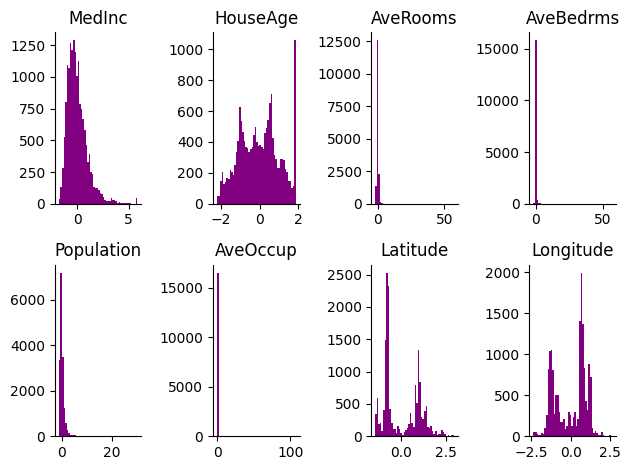

In [25]:
stand_df=pd.DataFrame(x_train_stand,columns=cal_df.columns[:8])
fig,ax=plt.subplots(2,4)
fig=stand_df.hist(ax=ax,bins=50,figsize=(25,25),grid=False,color="purple")
plt.tight_layout()
for i in range(0,2):
    for j in range(0,4):
        ax[i,j].spines["top"].set_visible(False)
        ax[i,j].spines["right"].set_visible(False)


# fig,ax=plt.subplots(4,2,figsize=(25,12))
# for feature_name in cal_house.feature_names:
#     plt.hist(cal_house.cal_house[feature_name])


In [26]:
stand_model={"fit-intercept":[True,False],'R2':[],"RMSE":[]}

lr2=LinearRegression()
lr2.fit(x_train_stand,y_train)
y2_predicted=lr2.predict(x_test_stand)
stand_model['R2'].append(r2_score(y_test,y2_predicted))
stand_model['RMSE'].append(root_mean_squared_error(y_test,y2_predicted))

lr3=LinearRegression(fit_intercept=False)
lr3.fit(x_train_stand,y_train)
y3_predicted=lr1.predict(x_test_stand)
stand_model['R2'].append(r2_score(y_test,y3_predicted))
stand_model['RMSE'].append(root_mean_squared_error(y_test,y3_predicted))

stand_df=pd.DataFrame(stand_model)
stand_df


C:\Users\jyosn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,fit-intercept,R2,RMSE
0,True,0.575788,0.745581
1,False,-3.928046,2.541211


Model with `fit-intercept= true` had a lower RMSE value.

- With standardisation and feature selection

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


In [28]:

fs = SelectKBest(score_func=f_regression, k=1)

fs = fs.fit(x_train_stand, y_train)  #fitting on train set
x_train_stand_fs = fs.transform(x_train_stand)

x_test_stand_fs=fs.transform(x_test_stand)
print(x_train_stand.shape)

fs_stand_model={"fit-intercept":[True,False],'R2':[],"RMSE":[]}

lr4=LinearRegression()
lr4.fit(x_train_stand_fs,y_train)
y4_predicted=lr4.predict(x_test_stand_fs)
fs_stand_model['R2'].append(r2_score(y_test,y4_predicted))
fs_stand_model['RMSE'].append(root_mean_squared_error(y_test,y4_predicted))

lr5=LinearRegression(fit_intercept=False)
lr5.fit(x_train_stand_fs,y_train)
y5_predicted=lr5.predict(x_test_stand_fs)
fs_stand_model['R2'].append(r2_score(y_test,y5_predicted))
fs_stand_model['RMSE'].append(root_mean_squared_error(y_test,y5_predicted))

fs_stand_df=pd.DataFrame(fs_stand_model)
fs_stand_df


(16512, 8)


,fit-intercept,R2,RMSE
0,True,0.458859,0.842090
1,False,-2.830464,2.240418


- normalised and not feature selected

In [29]:
norm=MinMaxScaler().fit(X_train)
x_train_norm=norm.transform(X_train)
x_test_norm=norm.transform(X_test)

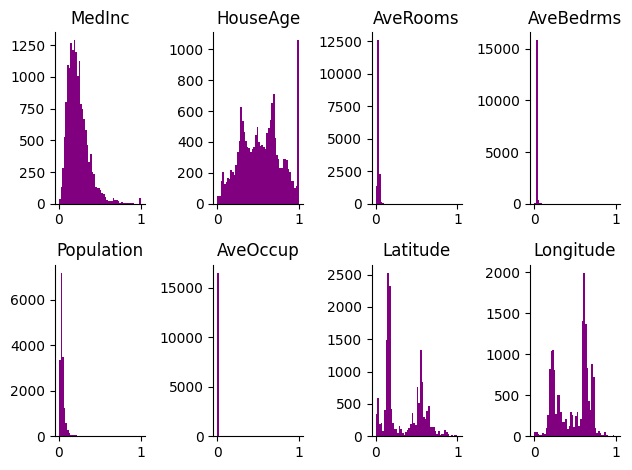

In [30]:
norm_df=pd.DataFrame(x_train_norm,columns=cal_df.columns[:8])
fig,ax=plt.subplots(2,4)
norm_df.hist(ax=ax,color="purple",bins=50,grid=False,figsize=(25,25))
plt.tight_layout()
for i in range(0,2):
    for j in range(0,4):
        ax[i,j].spines["top"].set_visible(False)
        ax[i,j].spines["right"].set_visible(False)

In [31]:
norm_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.190322,0.627451,0.029278,0.026601,0.064380,0.002414,0.017021,0.729084
1,0.228452,0.941176,0.025419,0.027968,0.036744,0.000842,0.129787,0.616534
2,0.252162,0.058824,0.033732,0.025759,0.025561,0.001634,0.224468,0.385458
3,0.099488,0.686275,0.022081,0.027683,0.039659,0.002657,0.014894,0.721116
4,0.210638,0.823529,0.038147,0.031651,0.024412,0.001294,0.450000,0.453187


In [32]:
norm_model={"fit-intercept":[True,False],'R2':[],"RMSE":[]}

lr6=LinearRegression()
lr6.fit(x_train_norm,y_train)
y6_predicted=lr6.predict(x_test_norm)
norm_model['R2'].append(r2_score(y_test,y6_predicted))
norm_model['RMSE'].append(root_mean_squared_error(y_test,y6_predicted))

lr7=LinearRegression(fit_intercept=False)
lr7.fit(x_train_norm,y_train)
y7_predicted=lr7.predict(x_test_norm)
norm_model['R2'].append(r2_score(y_test,y7_predicted))
norm_model['RMSE'].append(root_mean_squared_error(y_test,y7_predicted))

norm_model_df=pd.DataFrame(norm_model)
norm_model_df

,fit-intercept,R2,RMSE
0,True,0.575788,0.745581
1,False,0.502733,0.807232


- normalised and feature selected

In [33]:
norm_fs = SelectKBest(score_func=f_regression, k=6)

norm_fs = norm_fs.fit(x_train_norm, y_train)  #fitting on train set
x_train_norm_fs = norm_fs.transform(x_train_norm)

x_test_norm_fs=norm_fs.transform(x_test_stand)
print(x_train_norm_fs.shape)

fs_norm_model={"fit-intercept":[True,False],'R2':[],"RMSE":[]}

lr8=LinearRegression()
lr8.fit(x_train_stand_fs,y_train)
y8_predicted=lr8.predict(x_test_stand_fs)
fs_norm_model['R2'].append(r2_score(y_test,y8_predicted))
fs_norm_model['RMSE'].append(root_mean_squared_error(y_test,y8_predicted))

lr9=LinearRegression(fit_intercept=False)
lr9.fit(x_train_norm_fs,y_train)
y9_predicted=lr9.predict(x_test_norm_fs)
fs_norm_model['R2'].append(r2_score(y_test,y9_predicted))
fs_norm_model['RMSE'].append(root_mean_squared_error(y_test,y9_predicted))

fs_norm_df=pd.DataFrame(fs_norm_model)
fs_norm_df

(16512, 6)


,fit-intercept,R2,RMSE
0,True,0.458859,0.842090
1,False,-226.614641,17.270445


We can see that out of all the different configurations, the model with normalized/standardised features and that which didn't undergo any feature slection had the least RMSE value.

**- LR Model with removed columns, normalisation and feature selection**

Columns that had the least correlation with the target variable were AveBedrms and AveOccup.
AveBedrms is already related with Averooms, and AveOccup wouldn't possibly affect the value of a house. EVen if it did, it would be accounted for by the Average population of the area.
Hence removing them.

In [34]:
cal_df_drop=cal_df.drop(columns=["AveBedrms","AveOccup"])

X0=cal_df_drop.iloc[:,:6]
y0=cal_df_drop.iloc[:,6]
x0_train,x0_test,y0_train,y0_test=train_test_split(X0,y0,test_size=0.2,random_state=42)

norm0=MinMaxScaler().fit(x0_train)
x0_train_norm=norm0.transform(x0_train)
x0_test_norm=norm0.transform(x0_test)

lr0=LinearRegression()
lr0.fit(x0_train_norm,y0_train)
y0_predicted=lr0.predict(x0_test_norm)
print(root_mean_squared_error(y0_test,y0_predicted))
print(r2_score(y0_test,y0_predicted))


0.7406212106305609
0.5814132940601386


This is the lowest RMSE value that we've gotten so far.

___

**C. Plotting the results of best model Configuration**

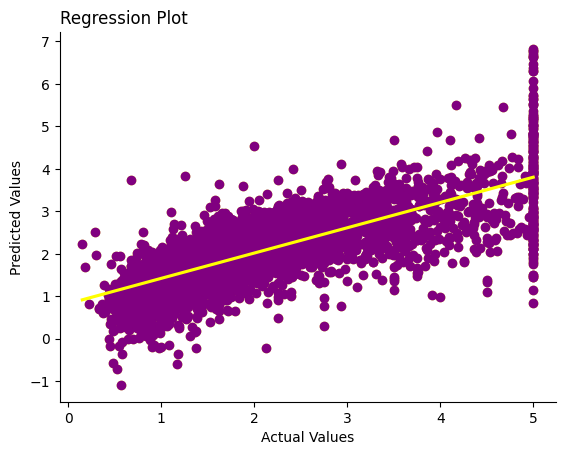

In [35]:
fig,ax=plt.subplots()

sns.regplot(x=y0_test,y=y0_predicted,ci=None,color="yellow")
plt.scatter(y0_test,y0_predicted,color="purple") #changing the order of these lines gives veryyy diff output!!
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Plot",loc="left")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

___

**D. Results:**

During EDA, the following  were observed:

1. The dataset didn't have any null vaues, hence did not require any substantial imputation.
2. After checking correlation among all the variable through the correlation matrix, two sets of features were correlated to one another:
    - Latitude and Longitude
    - AveBedroom and AveRooms
3. Some features like Median Income had high correlation with the target variable while some had low correlation like Average Occupancy.
4. Plotting all data points on the geographic map of California made it clear that the location significantly affected the house prices.
    Those houses which were in famuos counties and near to the a beach were priced high.
5. As each feature were in different ranges the columns were standardised/normalised and sent to the linear regression model. In some cases   feature selection was also done.
6. In every case, the model with `fit_intercept=True` was the better one.
7. Overall, the best model was the model where the columns AveOccup and AveBedrms were removed, after which the dataset was normalised.
8. The RMSE value was 0.74, while R**2 score was 0.58



___
**E. Conclusion**

A major factor that affected housing prices were the income and location of the houses. Out of multiple configurations removal of certain features that were of little significance to the target variable reduced the RMSE value by a small amount

___
**F. References**

https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

https://data.ca.gov/dataset/ca-geographic-boundaries

https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://github.com/kamalakarpeta/predictive_analysis_with_linear_regression/blob/master/california_predictive_analysis_with_linear_regression.ipynb

https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html